<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/ForecastingFProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting

[Facebook Prophet](https://facebook.github.io/prophet/docs/quick_start.html)

 Prophet fue diseñado para manejar casos de pronósticos comerciales

# Modulos básicos necesarios

## Tratamiento de datos

In [ ]:
import pandas as pd
import numpy as np

## Facebook Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.make_holidays import make_holidays_df
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

## Graficos

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
import plotly.offline as py

In [ ]:
from fbprophet.plot import (plot_plotly,
                            plot_components_plotly,
                            plot_forecast_component_plotly,
                            plot_seasonality_plotly)

# Conjunto de datos

In [ ]:
data01 = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/forecasting/4173985e-4223-4499-ac7e-653482869731.csv"
data02 = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/forecasting/79859d47-0fb6-4635-b5d0-36540d8b9dd4.csv"

In [ ]:
df01 = pd.read_csv(data01)
df02 = pd.read_csv(data02)

## Dataframe 01

In [ ]:
df01.head()

,ORIGEN,CUIT,DENOMINACION,PERIODO,CUOTA,COD ACTIVIDAD,DESCRIPCION CODIGO PROV,ALICUOTA,BASE IMPONIBLE,IMPUESTO Calculado Alícuota,IMPUESTO DETERMINADO (ADIB / DIU)
0,ADIB,30538596112,PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,2015,1,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,1542649.10,61705.96,61705.96
1,ADIB,30538596112,PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,2015,2,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2826481.24,113059.24,113059.24
2,ADIB,30538596112,PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,2015,3,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2819790.62,112791.62,112791.62
3,ADIB,30538596112,PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,2015,4,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2904493.66,116179.74,116179.74
4,ADIB,30538596112,PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,2015,5,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,3039687.52,121587.50,121587.50


In [ ]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ORIGEN                             79 non-null     object 
 1   CUIT                               79 non-null     int64  
 2   DENOMINACION                       79 non-null     object 
 3   PERIODO                            79 non-null     int64  
 4   CUOTA                              79 non-null     int64  
 5   COD ACTIVIDAD                      79 non-null     int64  
 6   DESCRIPCION CODIGO PROV            79 non-null     object 
 7   ALICUOTA                           79 non-null     float64
 8   BASE IMPONIBLE                     79 non-null     float64
 9   IMPUESTO Calculado Alícuota        79 non-null     float64
 10  IMPUESTO DETERMINADO (ADIB / DIU)  79 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 6.9+ KB


## Dataframe 02

In [ ]:
df02.head()

,PERIODO,CUOTA,CUIT SUJETO,CUIT AGENTE,TIPO,IMPORTE SUJETO,IMPORTE AGENTE,DIFERENCIA,MONTO IMPONIBLE
0,2019,10,30538596112 - PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,20120040155 - PULIAFITO ANTONIO,PERCEPCIÓN,89.88,89.88,0.00,3595.04
1,2016,1,30538596112 - PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,20081585505 - DAVID OSCAR RUBEN,PERCEPCIÓN,0.00,1832.93,-1832.93,61097.42
2,2016,2,30538596112 - PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,20081585505 - DAVID OSCAR RUBEN,PERCEPCIÓN,3334.84,3334.84,0.00,111161.16
3,2016,3,30538596112 - PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,20081585505 - DAVID OSCAR RUBEN,PERCEPCIÓN,2394.20,2394.20,0.00,79806.37
4,2016,4,30538596112 - PIZZERIA Y FIAMBRERIA CAPRI S.R.L.,20081585505 - DAVID OSCAR RUBEN,PERCEPCIÓN,4361.60,4361.60,0.00,145387.48


In [ ]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERIODO          1621 non-null   int64  
 1   CUOTA            1621 non-null   int64  
 2   CUIT SUJETO      1621 non-null   object 
 3   CUIT AGENTE      1621 non-null   object 
 4   TIPO             1621 non-null   object 
 5   IMPORTE SUJETO   1621 non-null   float64
 6   IMPORTE AGENTE   1621 non-null   float64
 7   DIFERENCIA       1621 non-null   float64
 8   MONTO IMPONIBLE  1621 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 114.1+ KB


## Análisis exploratorio de los datos

### Creación del campo fecha en df01

Convirtiendo la columna CUOTA y la columna PERIODO en cadena de caracteres

In [ ]:
df01.CUOTA = df01.CUOTA.astype(str)
df01.PERIODO = df01.PERIODO.astype(str)

Uniendo en columna FECHA los valores de CUOTA con PERIODO, separado con /

In [ ]:
df01["FECHA"] = df01['CUOTA'].str.cat(df01['PERIODO'], sep ="/") 

Convirtiendo el campo FECHA en tipo de dato datetime

In [ ]:
df01.FECHA = pd.to_datetime(df01['FECHA'])

In [ ]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ORIGEN                             79 non-null     object        
 1   CUIT                               79 non-null     int64         
 2   DENOMINACION                       79 non-null     object        
 3   PERIODO                            79 non-null     object        
 4   CUOTA                              79 non-null     object        
 5   COD ACTIVIDAD                      79 non-null     int64         
 6   DESCRIPCION CODIGO PROV            79 non-null     object        
 7   ALICUOTA                           79 non-null     float64       
 8   BASE IMPONIBLE                     79 non-null     float64       
 9   IMPUESTO Calculado Alícuota        79 non-null     float64       
 10  IMPUESTO DETERMINADO (ADIB / DIU)  79 no

### Creación del campo fecha en df02

Convirtiendo la columna CUOTA y la columna PERIODO en cadena de caracteres

In [ ]:
df02.CUOTA = df02.CUOTA.astype(str)
df02.PERIODO = df02.PERIODO.astype(str)

Uniendo en columna FECHA los valores de CUOTA con PERIODO, separado con /

In [ ]:
df02["FECHA"] = df02['CUOTA'].str.cat(df02['PERIODO'], sep ="/") 

Convirtiendo el campo FECHA en tipo de dato datetime

In [ ]:
df02.FECHA = pd.to_datetime(df02['FECHA'])

In [ ]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PERIODO          1621 non-null   object        
 1   CUOTA            1621 non-null   object        
 2   CUIT SUJETO      1621 non-null   object        
 3   CUIT AGENTE      1621 non-null   object        
 4   TIPO             1621 non-null   object        
 5   IMPORTE SUJETO   1621 non-null   float64       
 6   IMPORTE AGENTE   1621 non-null   float64       
 7   DIFERENCIA       1621 non-null   float64       
 8   MONTO IMPONIBLE  1621 non-null   float64       
 9   FECHA            1621 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 126.8+ KB


# Forecasting modelo de regresión aditiva


## Preparación de los datos para forecasting

Una vez que FECHA se encuentra en formato datetime, y para hacer uso de las funcionalidades de pandas, se establece como índice. 

In [ ]:
baseimponible = df01.copy(deep=True)

In [ ]:
baseimponible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ORIGEN                             79 non-null     object        
 1   CUIT                               79 non-null     int64         
 2   DENOMINACION                       79 non-null     object        
 3   PERIODO                            79 non-null     object        
 4   CUOTA                              79 non-null     object        
 5   COD ACTIVIDAD                      79 non-null     int64         
 6   DESCRIPCION CODIGO PROV            79 non-null     object        
 7   ALICUOTA                           79 non-null     float64       
 8   BASE IMPONIBLE                     79 non-null     float64       
 9   IMPUESTO Calculado Alícuota        79 non-null     float64       
 10  IMPUESTO DETERMINADO (ADIB / DIU)  79 no

## Armado del conjunto de datos

In [ ]:
baseimponible.drop(columns=["ORIGEN","CUIT","DENOMINACION","PERIODO","CUOTA","COD ACTIVIDAD",
                            "DESCRIPCION CODIGO PROV","ALICUOTA","IMPUESTO Calculado Alícuota",
                            "IMPUESTO DETERMINADO (ADIB / DIU)"], inplace = True)

In [ ]:
baseimponible = baseimponible[["FECHA","BASE IMPONIBLE"]]
baseimponiblereal = baseimponible

In [ ]:
baseimponible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           79 non-null     datetime64[ns]
 1   BASE IMPONIBLE  79 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
baseimponible.iloc[48:60,]

,FECHA,BASE IMPONIBLE
48,2019-01-01,2287180.20
49,2019-02-01,4661054.17
50,2019-03-01,5723236.23
51,2019-04-01,5331816.25
52,2019-05-01,6102829.82
53,2019-06-01,6793246.20
54,2019-07-01,7102157.86
55,2019-08-01,7228865.35
56,2019-09-01,6995498.96
57,2019-10-01,6904295.32


In [ ]:
base2018 = baseimponible.query("FECHA < '2019-01-01'")
base2019 = baseimponible.query("FECHA < '2020-01-01'")

In [ ]:
base2018 = base2018.rename(columns={"FECHA":"ds","BASE IMPONIBLE":"y"})

In [ ]:
base2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


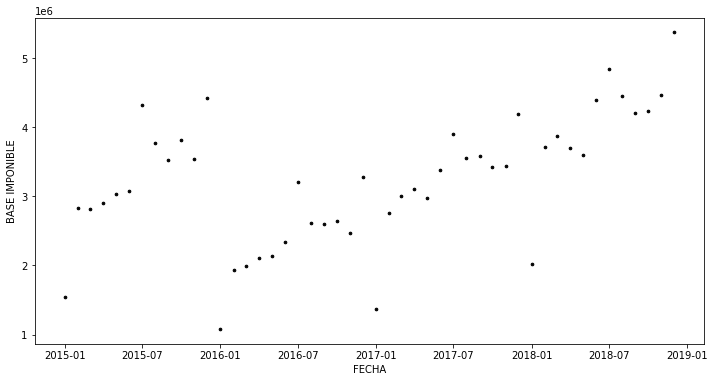

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(pd.to_datetime(base2018['ds']), base2018['y'], s=7, c='#000000')
plt.xlabel('FECHA')
plt.ylabel(r'BASE IMPONIBLE')
plt.show()

## Modelo 01 - Base

In [ ]:
model = Prophet(yearly_seasonality=True)
model.fit(base2018)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicción

In [ ]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

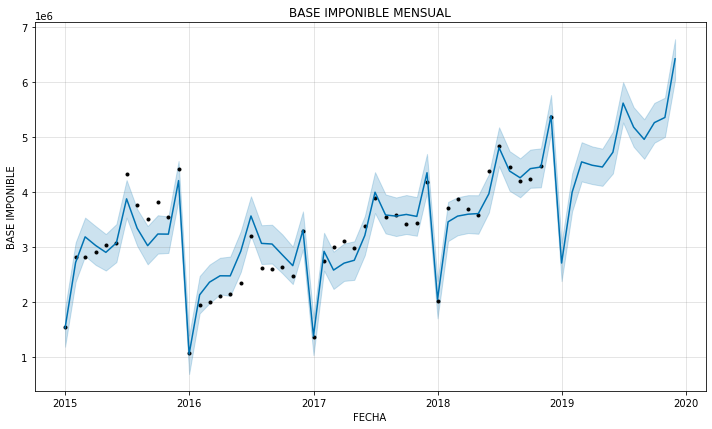

In [ ]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
plt.show()

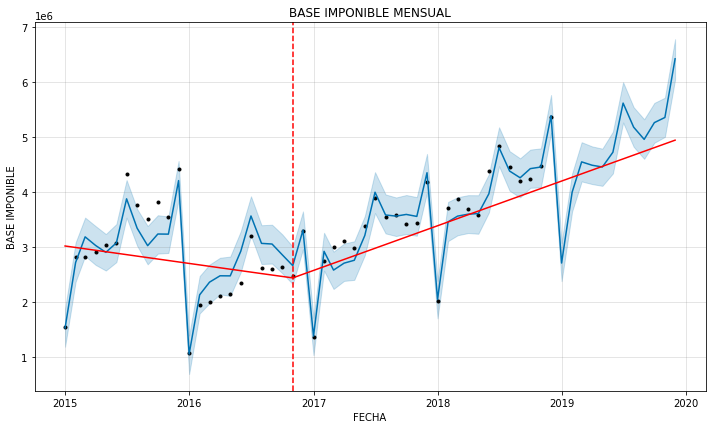

In [ ]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

## Graficos interactivos

In [ ]:
fig = plot_plotly(model, forecast, trend=True)
fig.show()

In [ ]:
fig = plot_components_plotly(model, forecast ,figsize=(800, 175))
fig.show()

In [ ]:
fig = plot_seasonality_plotly(model, 'yearly')
fig.show()

## Modelo 02 - Efecto dias festivos y vacaciones del país

In [ ]:
model = Prophet(yearly_seasonality=True)

In [ ]:
model.add_country_holidays(country_name='AR')

In [ ]:
model.fit(base2018)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicción

In [ ]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

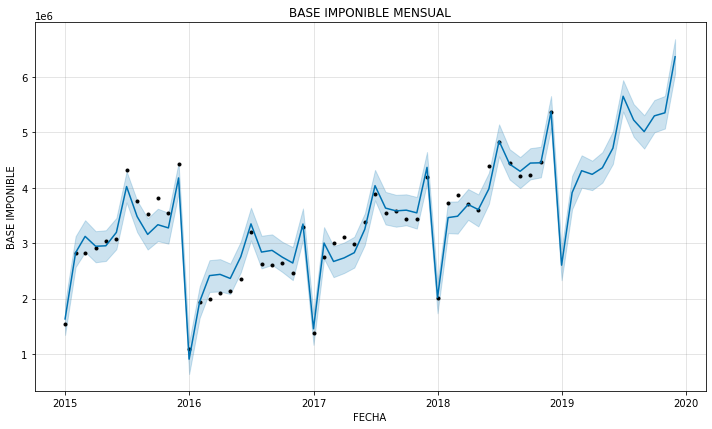

In [ ]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
plt.show()

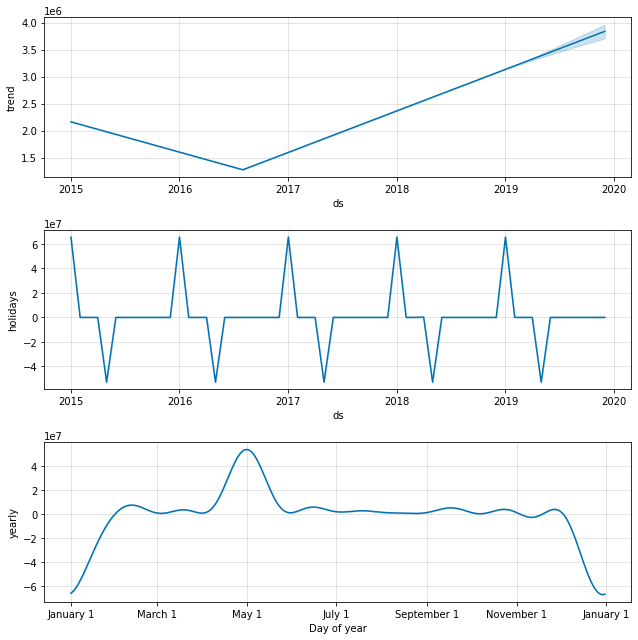

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
model.train_holiday_names

0                            Año Nuevo [New Year's Day]
1                      Día de Carnaval [Carnival's Day]
2     Semana Santa (Jueves Santo)  [Holy day (Holy T...
3     Día Nacional de la Memoria por la Verdad y la ...
4     Semana Santa (Viernes Santo)  [Holy day (Holy ...
5                           Día de Pascuas [Easter Day]
6     Día del Veterano y de los Caidos en la Guerra ...
7                          Día del Trabajo [Labour Day]
8     Día de la Revolucion de Mayo [May Revolution Day]
9     Día Pase a la Inmortalidad del General Martín ...
10    Día Pase a la Inmortalidad del General D. Manu...
11           Día de la Independencia [Independence Day]
12    Día Pase a la Inmortalidad del General D. José...
13    Día del Respeto a la Diversidad Cultural [Resp...
14    Día Nacional de la Soberanía [National Soverei...
15     La Inmaculada Concepción [Immaculate Conception]
16                                  Navidad [Christmas]
dtype: object

Puntos de cambio en tendencia

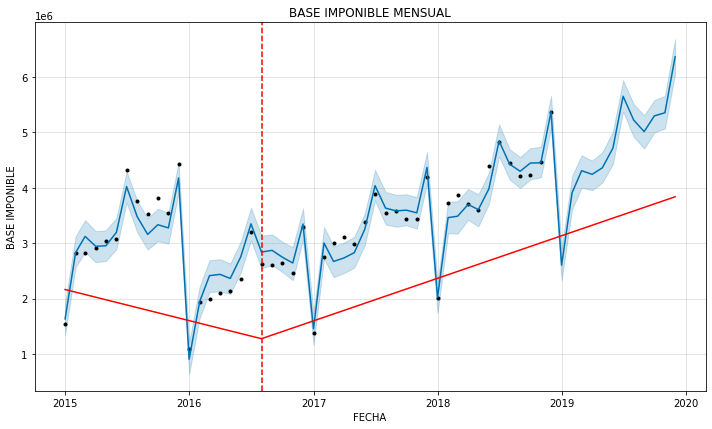

In [ ]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

## Graficos interactivos

In [ ]:
forecast.iloc[48:60,]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice],Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice]_lower,Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice]_upper,Día Nacional de la Soberanía [National Sovereignty Day],Día Nacional de la Soberanía [National Sovereignty Day]_lower,Día Nacional de la Soberanía [National Sovereignty Day]_upper,Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin],Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin]_lower,Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin]_upper,Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano],Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano]_lower,Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano]_upper,Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes],Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes]_lower,Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes]_upper,Día de Carnaval [Carnival's Day],Día de Carnaval [Carnival's Day]_lower,Día de Carnaval [Carnival's Day]_upper,Día de Pascuas [Easter Day],Día de Pascuas [Easter Day]_lower,Día de Pascuas [Easter Day]_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de la Revolucion de Mayo [May Revolution Day],Día de la Revolucion de Mayo [May Revolution Day]_lower,Día de la Revolucion de Mayo [May Revolution Day]_upper,Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day],Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day]_lower,Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War],Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War]_lower,Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War]_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Semana Santa (Jueves Santo) [Holy day (Holy Thursday)],Semana Santa (Jueves Santo) [Holy day (Holy Thursday)]_lower,Semana Santa (Jueves Santo) [Holy day (Holy Thursday)]_upper,Semana Santa (Viernes Santo) [Holy day (Holy Friday)],Semana Santa (Viernes Santo) [Holy day (Holy Friday)]_lower,Semana Santa (Viernes Santo) [Holy day (Holy Friday)]_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
48,2019-01-01,3.134105e+06,2.330719e+06,2.895394e+06,3.132711e+06,3.135701e+06,6.566750e+07,6.566750e+07,6.566750e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
fig = plot_plotly(model, forecast, trend=True)
fig.show()

In [ ]:
fig = plot_components_plotly(model, forecast ,figsize=(800, 175))
fig.show()

In [ ]:
fig = plot_seasonality_plotly(model, 'yearly')
fig.show()

# Dataframe

In [ ]:
prediccion2019 = base2019.copy(deep=True)

In [ ]:
prediccion2019["PREDICCION"] = forecast.trend 

In [ ]:
prediccion2019.iloc[48:60,]

,FECHA,BASE IMPONIBLE,PREDICCION
48,2019-01-01,2287180.20,3.134105e+06
49,2019-02-01,4661054.17,3.199396e+06
50,2019-03-01,5723236.23,3.258368e+06
51,2019-04-01,5331816.25,3.323658e+06
52,2019-05-01,6102829.82,3.386842e+06
53,2019-06-01,6793246.20,3.452133e+06
54,2019-07-01,7102157.86,3.515317e+06
55,2019-08-01,7228865.35,3.580607e+06
56,2019-09-01,6995498.96,3.645897e+06
57,2019-10-01,6904295.32,3.709082e+06
